### Import Packages 

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
## importing the train dataset
Data_train = pd.read_csv ('C:/Users/krrish/Documents/projects/black friday project/train/train.csv')
Data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
## importing the test data
Data_test = pd.read_csv('C:/Users/krrish/Documents/projects/black friday project/test/test.csv')
Data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
## Merging both train and test data
Data=Data_train.append(Data_test)
Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
## dimensions of the dataset
Data.shape

(783667, 12)

## Visualization

##### Comment : As we know that "Product Id" and "User_ID" both are not usable for eda ,so we drop them. 

In [10]:
Data.drop (columns = ['User_ID', 'Product_ID'], inplace = True)

In [11]:
Data ['Gender'].value_counts(dropna = False)

M    590031
F    193636
Name: Gender, dtype: int64

In [12]:
Data ['Age'].value_counts(dropna = False)

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

Text(0.5, 1.0, 'Diversity of the Ages of Customers.')

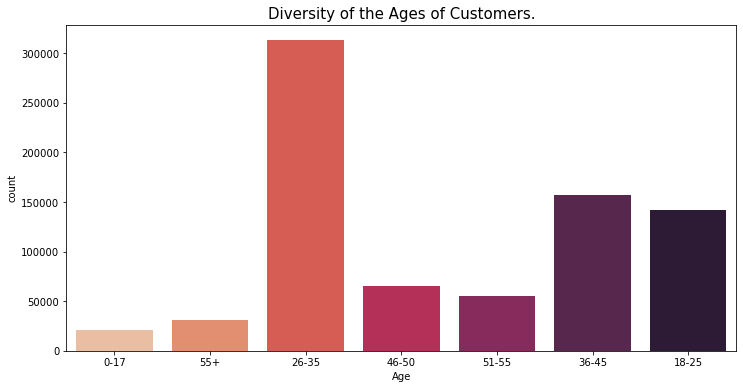

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age',data=Data, palette='rocket_r')
plt.title("Diversity of the Ages of Customers.", size =15)

ANALYSIS: As per the above analysis, we can see various age groups, but the youth are participating the most.


In [9]:
Data ['Product_Category_1'].value_counts(dropna = False)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

<AxesSubplot:>

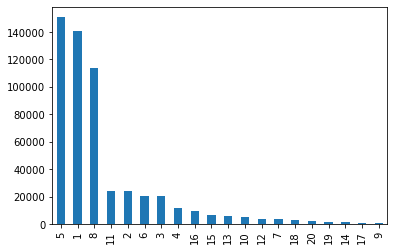

In [10]:
Data ['Product_Category_1'].value_counts().plot(kind ='bar')

Comment : As per the above analysis category 5 of 'Product_Catergory_1' has the maximum count which is 150933 and category 9 has the minimum count which is 410. As of now we cannot assume that which kind of product falls under this category.

<AxesSubplot:>

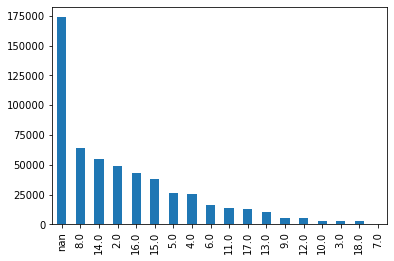

In [11]:
Data ['Product_Category_2'].value_counts(dropna = False).plot (kind ='bar')

<AxesSubplot:>

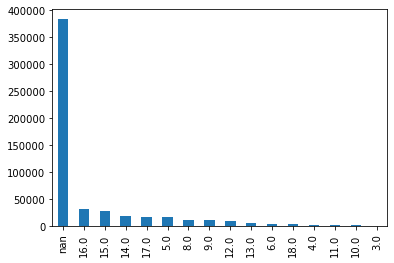

In [12]:
Data ['Product_Category_3'].value_counts(dropna = False).plot(kind = 'bar')

ANALYSIS : As per the above 2 graph's analysis, we can see that the maximum count of product categories are unknown, filled with NaN, means these are missing values. We can replace null values with a special number so as to predict the data correctly. We cannot drop the null values here.

C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Plotting the Purchase during the Black Friday sale.'}, xlabel='Purchase', ylabel='Density'>

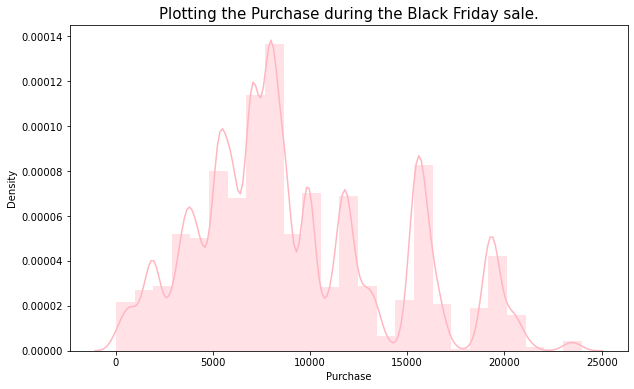

In [13]:
plt.figure(figsize=(10, 6))
plt.title('Plotting the Purchase during the Black Friday sale.', size = 15)
sns.distplot(Data['Purchase'], bins=25 , color ='lightpink')

this plot is representing that maximum purchase is between 5000-10000.

Text(0.5, 1.0, 'Types of cities regarding customers.')

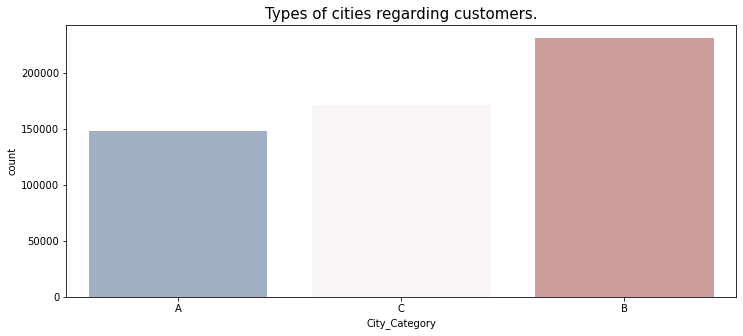

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='City_Category',data=Data, palette='vlag')
plt.title("Types of cities regarding customers.", size =15)

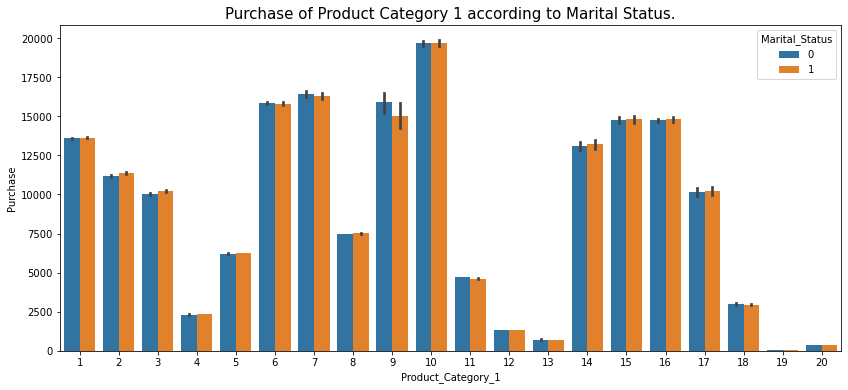

In [15]:
plt.figure(figsize=[14,6])

sns.barplot(data=Data,x='Product_Category_1',y='Purchase',hue='Marital_Status')

plt.title("Purchase of Product Category 1 according to Marital Status.", size =15)

plt.show()

Text(0.5, 1.0, 'Staying in the city for years more than...')

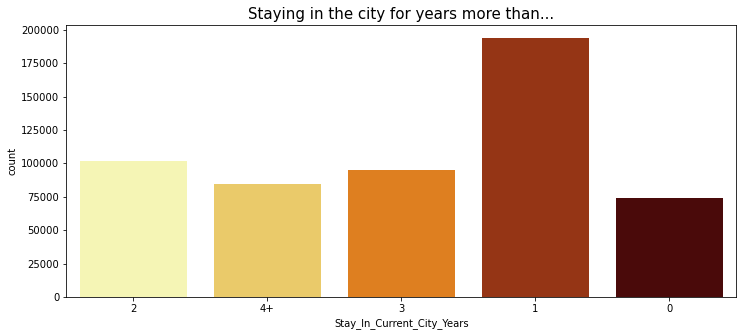

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x='Stay_In_Current_City_Years',data=Data, palette='afmhot_r')
sns.set_context('notebook')
plt.title("Staying in the city for years more than...", size =15)

Text(0.5, 1.0, 'Ratio of Purchase Made By Gender')

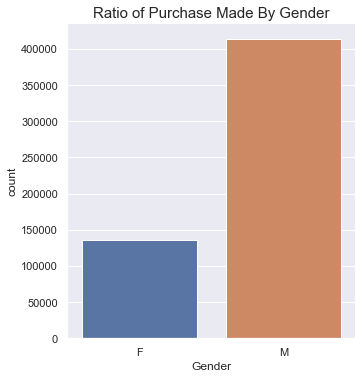

In [17]:
sns.set(style= "darkgrid")
sns.catplot(x="Gender", kind="count",data=Data);
plt.title('Ratio of Purchase Made By Gender', size =15)

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

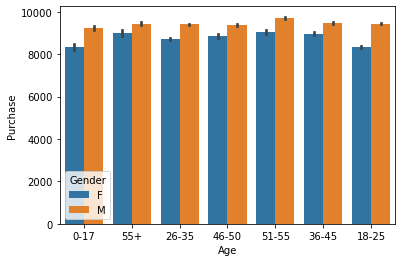

In [15]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue='Gender',data=Data)

Purchasing of men is high then women

### MISSING VALUE TREATMENT

In [24]:
df1 = Data.copy()

In [25]:
## Replacing the missing values in Product_category 2 and 3 
df1['Product_Category_2'] =df1['Product_Category_2'].fillna(999).astype('int64')
df1['Product_Category_3'] =df1['Product_Category_3'].fillna(999).astype('int64')

In [26]:
# removing special characters, like (+) in Stay_In_Current_City_Years column
df1['Stay_In_Current_City_Years'] =df1.Stay_In_Current_City_Years.replace('4+', 4)
df1['Stay_In_Current_City_Years']=df1['Stay_In_Current_City_Years'].astype(int)

In [27]:
##Handling categorical feature Gender
df1['Gender']=df1['Gender'].map({'F':0,'M':1})

In [28]:
## Handle categorical feature Age
df1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [29]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
df1['Age']= label_encoder.fit_transform(df1['Age'])
 
df1['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [30]:
##fixing categorical feature City_category
df2 = pd.get_dummies(df1,columns=['City_Category'],drop_first=True)

In [31]:
df2.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0,0,10,2,0,3,999,999,8370.0,0,0
1,0,0,10,2,0,1,6,14,15200.0,0,0
2,0,0,10,2,0,12,999,999,1422.0,0,0
3,0,0,10,2,0,12,14,999,1057.0,0,0
4,1,6,16,4,0,8,999,999,7969.0,0,1


In [32]:
df2.dtypes

Gender                          int64
Age                             int32
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2              int64
Product_Category_3              int64
Purchase                      float64
City_Category_B                 uint8
City_Category_C                 uint8
dtype: object

## outlier treatment

In [33]:
df2.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, .1, .25,.5,.75, .9,.95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Gender,783667.0,0.752910,0.431320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0
Age,783667.0,2.496802,1.352736,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,5.0,5.0,6.0,6.00,6.0,6.0
Occupation,783667.0,8.079300,6.522206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,14.0,17.0,20.0,20.0,20.0,20.00,20.0,20.0
Stay_In_Current_City_Years,783667.0,1.858247,1.288790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.00,4.0,4.0
Marital_Status,783667.0,0.409777,0.491793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0
Product_Category_1,783667.0,5.366196,3.878160,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,8.0,11.0,13.0,15.0,15.0,16.00,18.0,20.0
Product_Category_2,783667.0,320.326441,459.057642,2.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,14.0,999.0,999.0,999.0,999.0,999.0,999.00,999.0,999.0
Product_Category_3,783667.0,699.629460,453.498920,3.0,5.0,5.0,5.0,6.0,8.0,12.0,16.0,999.0,999.0,999.0,999.0,999.0,999.0,999.00,999.0,999.0
Purchase,550068.0,9263.968713,5023.065394,12.0,587.0,954.0,1574.0,1789.0,1984.0,3540.0,5823.0,8047.0,12054.0,16317.0,19336.0,19480.0,19628.0,20202.66,20665.0,23961.0
City_Category_B,783667.0,0.420764,0.493682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0


In [28]:
df2.mean() + 3*df2.std()

Gender                            2.046721
Age                               6.557324
Occupation                       27.644688
City_Category                     4.323272
Stay_In_Current_City_Years        5.726745
Marital_Status                    1.884963
Product_Category_1               17.212904
Product_Category_2             1701.369513
Product_Category_3             2060.058361
Purchase                      24333.164894
dtype: float64

No outliers present in the data

## Correlation matrix

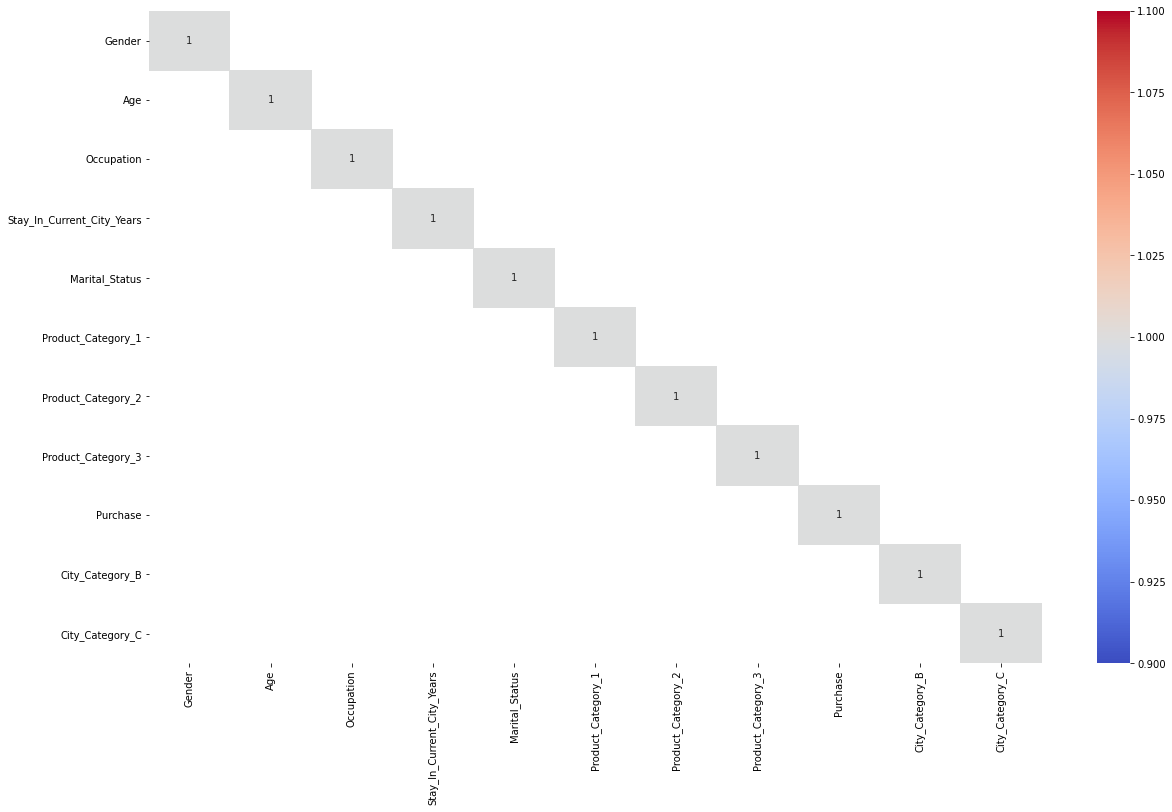

In [34]:
corr_matrix = df2.corr() 
#filter correlation values above 0.5
filter_corr = corr_matrix[corr_matrix > 0.5]
#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,
            cmap='coolwarm',
            annot=True);

No multicollinearity in the data

## Using VIF for feature selection

In [36]:
df2.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [38]:
vars_from_Corr = ['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'City_Category_B', 'City_Category_C']

from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = df2[vars_from_Corr]

In [39]:
# For each column, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif.sort_values('vif_value', ascending=False)

,vif_value,features
1,4.391494,Age
7,4.336334,Product_Category_3
5,3.841513,Product_Category_1
0,3.340717,Gender
3,2.714144,Stay_In_Current_City_Years
2,2.479828,Occupation
8,2.247133,City_Category_B
6,2.033106,Product_Category_2
9,1.990414,City_Category_C
4,1.864994,Marital_Status


No Variables with VIF

## Splitting the train and test data

In [40]:
df_test=df2[df2['Purchase'].isnull()]
df_test.shape

(233599, 11)

In [42]:
df_train=df2[~df2['Purchase'].isnull()]
df_train.shape

(550068, 11)

In [43]:
#Splitting the DATA
y=df_train["Purchase"]
X=df_train.drop(columns=["Purchase"])

In [44]:
from sklearn.model_selection import train_test_split

In [101]:
X_train , X_test, y_train , y_test=train_test_split(X,y, test_size=0.3, random_state=70)

C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

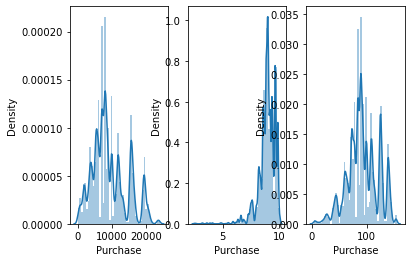

In [47]:
## checking the distribution of Purchase
plt.subplot(131)
sns.distplot(y)

plt.subplot(132)
sns.distplot(np.log(y))

plt.subplot(133)
sns.distplot(np.sqrt(y))

plt.show()

Normal distribution is not followed in the data so we cannot use linear regression as the error will be very big.

#### ALGORITHM - LINEAR REGRESSION

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
LR = LinearRegression()

In [104]:
LR.fit(X_train, y_train)

LinearRegression()

In [105]:
print(" LR Train Score :", LR.score(X_train, y_train))
print("LR Test Score :", LR.score(X_test, y_test))

 LR Train Score : 0.1575664132258121
LR Test Score : 0.15815823022944475


In [106]:
y_pred_train_lr=LR.predict(X_train)
y_pred_train_lr

array([10986.4124294 ,  8313.16829348,  9811.60856949, ...,
        5197.91532636,  7768.41359396,  7310.72417685])

In [107]:
y_pred_test_lr=LR.predict(X_test)
y_pred_test_lr

array([ 8468.92574067, 12453.09651534,  9511.71411402, ...,
        8686.653854  ,  5918.47199197, 12456.68084386])

In [108]:
print("Train MSE :", np.mean((y_train-y_pred_train_lr)**2))
print("Test MSE :", np.mean((y_test-y_pred_test_lr)**2))

Train MSE : 21262436.489705052
Test MSE : 21224583.58657921


In [109]:
print("Train RMSE :", np.sqrt(np.mean((y_train-y_pred_train_lr)**2)))
print("Test RMSE :", np.sqrt(np.mean((y_test-y_pred_test_lr)**2)))

Train RMSE : 4611.12095804318
Test RMSE : 4607.014606725185


#### ALGORITHM - DECISION TREE [REGRESSOR]

In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
DtR=DecisionTreeRegressor()

DtR.fit(X_train, y_train)

print("Train Accuracy:", DtR.score(X_train,y_train))
print("Test Accuracy:", DtR.score(X_test,y_test))

Train Accuracy: 0.8083750401945649
Test Accuracy: 0.5543088859542125


In [113]:
DtR=DecisionTreeRegressor(max_depth=10,random_state=70)

DtR.fit(X_train, y_train)

print("Train Accuracy:", DtR.score(X_train,y_train))
print("Test Accuracy:", DtR.score(X_test,y_test))

Train Accuracy: 0.6625573972054892
Test Accuracy: 0.6543815864590928


In [114]:
DtR1=DecisionTreeRegressor(max_depth=10,random_state=70, criterion='squared_error')

DtR1.fit(X_train, y_train)

print("Train Accuracy:", DtR1.score(X_train,y_train))
print("Test Accuracy:", DtR1.score(X_test,y_test))

Train Accuracy: 0.6625573972054892
Test Accuracy: 0.6543815864590928


In [116]:
DtR2=DecisionTreeRegressor(max_depth=10,random_state=70,min_samples_split=2, min_samples_leaf=1)

DtR2.fit(X_train, y_train)

print("Train Accuracy:", DtR2.score(X_train,y_train))
print("Test Accuracy:", DtR2.score(X_test,y_test))

Train Accuracy: 0.6625573972054892
Test Accuracy: 0.6543815864590928


In [118]:
DtR2=DecisionTreeRegressor(max_depth=10,random_state=70, min_samples_leaf=20 ,min_samples_split=150)

DtR2.fit(X_train, y_train)

print("Train Accuracy:", DtR2.score(X_train,y_train))
print("Test Accuracy:", DtR2.score(X_test,y_test))    

Train Accuracy: 0.6608940125378959
Test Accuracy: 0.6556376314748318


#### hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_1 = {'max_depth': [5,10,20],
                'min_samples_split': [50,100,150], 
                "min_samples_leaf" : [5,10,15,20],
                'criterion': ['mse', 'mae']
     
               }

dtr = DecisionTreeRegressor(random_state=70)

dtr_grid = RandomizedSearchCV(dtr, param_grid_1, cv=5, verbose=1, n_jobs=4)

dtr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
dtr_grid.best_params_

In [ ]:
dtr_grid.best_score_

In [ ]:
DtR3=DecisionTreeRegressor(max_depth=dtr_grid.best_params_['max_depth'], 
                           criterion=dtr_grid.best_params_['criterion'], 
                           min_samples_split=dtr_grid.best_params_['min_samples_split'], 
                           min_samples_leaf=dtr_grid.best_params_['min_samples_leaf'])

DtR3.fit(X_train, y_train)

print("Train Accuracy:", DtR3.score(X_train,y_train))
print("Test Accuracy:", DtR3.score(X_test,y_test))

In [119]:
y_pred_train_dt=DtR2.predict(X_train)
y_pred_train_dt

array([ 9854.26656026,  6024.63662512,  6638.97358283, ...,
       14651.49504146,  7739.45964264,  7391.07378911])

In [120]:
y_pred_test_dt=DtR2.predict(X_test)
y_pred_test_dt

array([ 6799.14304462, 14453.56906615, 13871.74336283, ...,
        5818.56713857,  4671.48773885, 13728.07587822])

In [121]:
print("Train RMSE", np.sqrt(np.mean((y_train-y_pred_train_dt)**2)))
print("Test RMSE", np.sqrt(np.mean((y_test-y_pred_test_dt)**2)))

Train RMSE 2925.5424694919993
Test RMSE 2946.539023007649


### ALGORITHM - RANDOM FOREST

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
Rf=RandomForestRegressor(max_depth=5, random_state=70)

Rf.fit(X_train, y_train)

print("Train Accuracy:", Rf.score(X_train, y_train))
print("Test Accuracy:", Rf.score(X_test,y_test))

Train Accuracy: 0.5797872977755361
Test Accuracy: 0.5788147048534555


In [125]:
Rf1=RandomForestRegressor(max_depth=10, random_state=70, min_samples_split=2, min_samples_leaf=1)
Rf1.fit(X_train, y_train)

print("Train Accuracy:", Rf1.score(X_train, y_train))
print("Test Accuracy:", Rf1.score(X_test,y_test))

Train Accuracy: 0.6661165218054086
Test Accuracy: 0.6583396803648056


In [70]:
rf2=RandomForestRegressor(max_depth=10, random_state=70, min_samples_split=100, min_samples_leaf=10)
rf2.fit(X_train, y_train)
print("Train Accuracy :", rf2.score(X_train,y_train))
print("Test Accuracy :", rf2.score(X_test,y_test))

Train Accuracy : 0.6636608707887957
Test Accuracy : 0.6583412874465873


In [126]:
rf2=RandomForestRegressor(max_depth=15, random_state=70, min_samples_split=100, min_samples_leaf=10)
rf2.fit(X_train, y_train)
print("Train Accuracy :", rf2.score(X_train,y_train))
print("Test Accuracy :", rf2.score(X_test,y_test))

Train Accuracy : 0.6784421815780521
Test Accuracy : 0.6640343155653883


#### hyperparameter tuning

In [178]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_1 = {'max_depth': [7,10,15],
                'n_estimators':[25, 50, 100],
                'min_samples_split': [50,100,150,200],
                "min_samples_leaf" : [2,5,10]
     
               }

clf = RandomForestRegressor(random_state=70)

rf_grid = RandomizedSearchCV(clf, param_grid_1, cv=5, verbose=1, n_jobs=4)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=70),
                   n_jobs=4,
                   param_distributions={'max_depth': [7, 10, 15],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [50, 100, 150,
                                                              200],
                                        'n_estimators': [25, 50, 100]},
                   verbose=1)

In [193]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_depth': 15}

In [194]:
rf_grid.best_score_

0.6647299967357743

In [197]:
rf3=RandomForestRegressor(n_estimators=rf_grid.best_params_['n_estimators'],
                           max_depth=rf_grid.best_params_['max_depth'], 
                           min_samples_split=rf_grid.best_params_["min_samples_split"],
                           min_samples_leaf=rf_grid.best_params_["min_samples_leaf"]
                            
                          )
rf3.fit(X_train, y_train) 
print("Train Accuracy :", rf3.score(X_train,y_train))
print("Test Accuracy :", rf3.score(X_test,y_test))

Train Accuracy : 0.6787300796993418
Test Accuracy : 0.663873060161692


In [209]:
y_pred_train_rf=rf2.predict(X_train)
y_pred_train_rf

array([ 9825.17812301,  5879.17142221,  6490.10538724, ...,
       14219.28887313,  7564.6508484 ,  7425.60769953])

In [210]:
y_pred_test_rf=rf2.predict(X_test)
y_pred_test_rf

array([ 7310.70574485, 14418.21711313, 14057.97243238, ...,
        5843.28240272,  4867.39543908, 13875.24747922])

In [211]:
print("Train RMSE :", np.sqrt(np.mean((y_train-y_pred_train_rf)**2)))
print("Test RMSE :", np.sqrt(np.mean((y_test-y_pred_test_rf)**2)))

Train RMSE : 2848.8410251609635
Test RMSE : 2910.394187687131


### ALGORITHM - XG BOOST

In [130]:
from xgboost import XGBRFRegressor

In [131]:
Xgbr = XGBRFRegressor(learning_rate=1.0, max_depth=7, min_child_weight=45, seed=54)

Xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=7, min_child_weight=45, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=54, reg_alpha=0,
               scale_pos_weight=1, seed=54, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [132]:
print("Train Accuracy:", Xgbr.score(X_train, y_train))
print("Test Accuracy:", Xgbr.score(X_test,y_test))

Train Accuracy: 0.6427033692450534
Test Accuracy: 0.6403466103700406


In [133]:
Xgbr1 = XGBRFRegressor(learning_rate=1.0, max_depth=5, min_child_weight=30, seed=54)

Xgbr1.fit(X_train, y_train)

print("Train Accuracy:", Xgbr1.score(X_train, y_train))
print("Test Accuracy:", Xgbr1.score(X_test,y_test))

Train Accuracy: 0.5385222942818747
Test Accuracy: 0.5379378594787303


In [134]:
Xgbr2 = XGBRFRegressor(learning_rate=1.0, max_depth=10, min_child_weight=40, seed=0, random_state=70)

Xgbr2.fit(X_train, y_train)

print("Train Accuracy:", Xgbr2.score(X_train, y_train))
print("Test Accuracy:", Xgbr2.score(X_test,y_test))

Train Accuracy: 0.6634649214127704
Test Accuracy: 0.6581028829811029


In [143]:
Xgbr2 = XGBRFRegressor(learning_rate=1.0, max_depth=15, min_child_weight=40, seed=10, random_state=70)

Xgbr2.fit(X_train, y_train)

print("Train Accuracy:", Xgbr2.score(X_train, y_train))
print("Test Accuracy:", Xgbr2.score(X_test,y_test))

Train Accuracy: 0.6769117013704423
Test Accuracy: 0.663167924860916


#### hyperparameter tuning

In [149]:
from sklearn.model_selection import RandomizedSearchCV

params =  {'max_depth': [2,5,6,10],
            'learning_rate':[0.5,1.0,1.5],
            'seed': [0,2,4],
            'min_child_weight': [20,40,50,100]
     
              }

xgb_reg = XGBRFRegressor(random_state=89)

xgb_reg_grid = RandomizedSearchCV(xgb_reg, params, cv=5, verbose=1, n_jobs=-1)

xgb_reg_grid.fit(X_train, y_train)                

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror',
                                     

In [150]:
xgb_reg_grid.best_params_

{'seed': 2, 'min_child_weight': 40, 'max_depth': 10, 'learning_rate': 1.0}

In [151]:
xgb_reg_grid.best_score_

0.6594769446300563

In [156]:
Xgbr3 = XGBRFRegressor(learning_rate=xgb_reg_grid.best_params_['learning_rate'],
                     max_depth=xgb_reg_grid.best_params_['max_depth'], 
                     seed=xgb_reg_grid.best_params_['seed'],
                     min_child_weight=xgb_reg_grid.best_params_['min_child_weight'])

Xgbr3.fit(X_train, y_train)

print("Train Accuaracy:", Xgbr3.score(X_train, y_train))
print("Test Accuaracy:", Xgbr3.score(X_test,y_test))

Train Accuaracy: 0.6630613374741652
Test Accuaracy: 0.6577691530792089


In [160]:
Xgbr_y_Pred_train = Xgbr2.predict(X_train)
Xgbr_y_Pred_train

array([ 9994.154 ,  5910.15  ,  6486.782 , ..., 14196.516 ,  7589.9814,
        7415.4   ], dtype=float32)

In [161]:
Xgbr_y_Pred_test = Xgbr2.predict(X_test)
Xgbr_y_Pred_test

array([ 7286.9604, 14550.402 , 13883.193 , ...,  5791.395 ,  4806.054 ,
       13870.368 ], dtype=float32)

In [162]:
print("Train RMSE", np.sqrt(np.mean((y_train-Xgbr_y_Pred_train)**2)))
print("Test RMSE", np.sqrt(np.mean((y_test-Xgbr_y_Pred_test)**2)))

Train RMSE 2855.612620826282
Test RMSE 2914.144444097079


## Comparison of Models

In [179]:
Col_Name=["Model Name","Accuracy","RMSE"]

In [180]:
Model_Name=["Linear Regression","Decision Tree","Random Forest","XGboost"]

In [212]:
Accuracy=[round(LR.score(X_test,y_test),2),round(DtR2.score(X_test,y_test),2),round(rf2.score(X_test,y_test),2),
         round(Xgbr2.score(X_test,y_test),2)]

In [213]:
RMSE=[round(np.sqrt(np.mean((y_test-y_pred_test_lr)**2)),2),
         round(np.sqrt(np.mean((y_test-y_pred_test_dt)**2)),2),
          round(np.sqrt(np.mean((y_test-y_pred_test_rf)**2)),2),
           round(np.sqrt(np.mean((y_test-Xgbr_y_Pred_test)**2)),2)]

In [214]:
comp=(Model_Name,Accuracy,RMSE)

In [215]:
comp_df=pd.DataFrame(comp,)

In [216]:
comparison_df=pd.DataFrame(data=list(zip(Model_Name,Accuracy,RMSE)),columns=Col_Name)

In [217]:
comparison_df

,Model Name,Accuracy,RMSE
0,Linear Regression,0.16,4607.01
1,Decision Tree,0.66,2946.54
2,Random Forest,0.66,2910.39
3,XGboost,0.66,2914.14


## prediction on test data

In [171]:
df_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1,4,7,2,1,1,11,999,NaN,1,0
1,1,2,17,0,0,3,5,999,NaN,0,1
2,0,3,1,4,1,5,14,999,NaN,1,0
3,0,3,1,4,1,4,9,999,NaN,1,0
4,0,2,1,1,0,4,5,12,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,2,15,4,1,8,999,999,NaN,1,0
233595,0,2,15,4,1,5,8,999,NaN,1,0
233596,0,2,15,4,1,1,5,12,NaN,1,0
233597,0,4,1,4,0,10,16,999,NaN,0,1


In [172]:
test = df_test.drop(columns=['Purchase'])

In [173]:
Pred_Test=rf2.predict(test)
Pred_Test

array([14492.8698958 , 10407.43449296,  6438.57580641, ...,
       13319.37465667, 20014.18755445,  2310.83151372])

In [175]:
Pred_data=pd.DataFrame(Pred_Test,columns=['Purchase'])
Pred_data

,Purchase
0,14492.869896
1,10407.434493
2,6438.575806
3,2584.479089
4,2815.308475
...,...
233594,7489.452114
233595,6548.665363
233596,13319.374657
233597,20014.187554


## final submission code

In [177]:
Pred_data['ID'] = Data_test['User_ID']
Pred_data

,Purchase,ID
0,14492.869896,1000004
1,10407.434493,1000009
2,6438.575806,1000010
3,2584.479089,1000010
4,2815.308475,1000011
...,...,...
233594,7489.452114,1006036
233595,6548.665363,1006036
233596,13319.374657,1006036
233597,20014.187554,1006037
